# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import seaborn.apionly as sns
import statsmodels.api as sm

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
dt = pd.read_csv('cleaned data/merged_dataset.csv').drop('Unnamed: 0', axis=1)

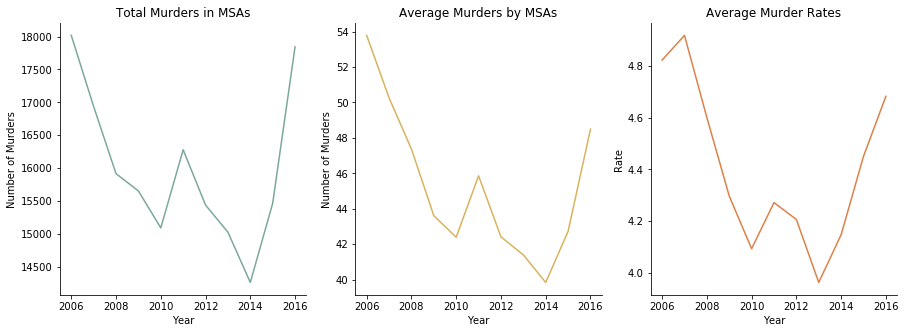

In [3]:
summ=dt.groupby('year').sum()
ave=dt.groupby('year').mean()
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(summ.Estimated, color="#7BA79D")
ax[0].set_title('Total Murders in MSAs')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Murders')
sns.despine()

ax[1].plot(ave.Estimated, color='#D8B25C')
ax[1].set_title('Average Murders by MSAs')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of Murders')

ax[2].plot(ave.Rate, color="#DD8047")
ax[2].set_title('Average Murder Rates')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Rate')
sns.despine()


These graphs show total and average murders and average murder rates in MSAs from 2006-2016. If we just look at them we would have to agree with Donald Trump's statement as from 2014 we can see a clear increase in number of murders and murder rate.  

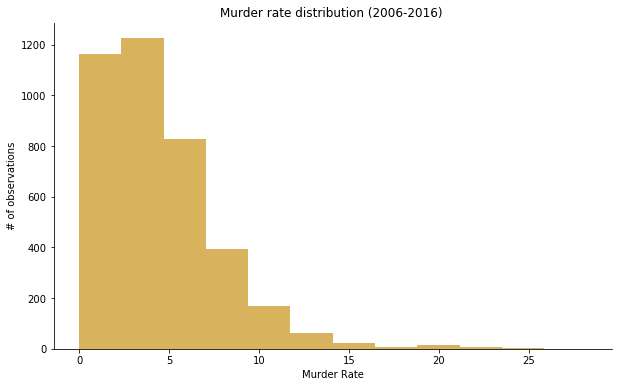

In [4]:
fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.hist(dt['Rate'], bins=12, label="2010", color='#D8B25C')
ax.set_ylabel('# of observations')
ax.set_xlabel('Murder Rate')
ax.set_title('Murder rate distribution (2006-2016) ')

sns.despine()

Once we graph the distribution of the murder rate in these years, we can see that there is high concentration of them between 0 and 5. Thus, showing that there might be some outliers that can be driving changes in the distribution. 

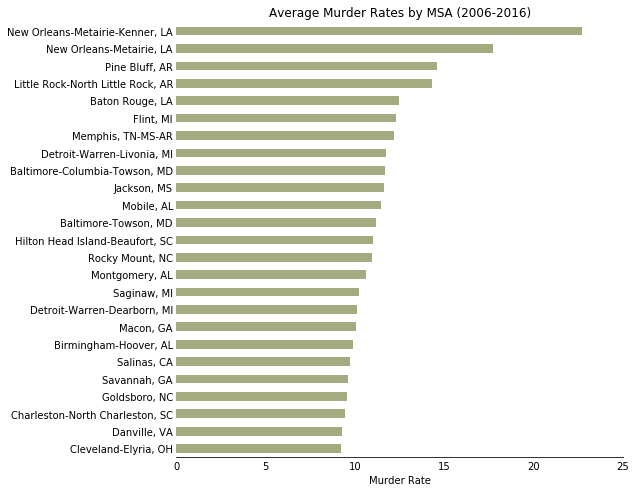

In [74]:
ave=dt.groupby('MSA_name').mean()
ave=ave.sort_values(by=['Rate'])
ave=ave[-25:]
plt.figure(figsize=(8, 8))
ax = plt.gca()
(ave['Rate']).plot(kind="barh", color="#A5AB81")
plt.xlabel("Murder Rate")
plt.ylabel("")
ax.tick_params(axis='both', which='both',length=0)
plt.title('Average Murder Rates by MSA (2006-2016)')
ax.set_xlim(0,25)
sns.despine(left=True)


This graph represents which are the 25 MSAs with the highest levels of Murder Rates from 2006 till 2016. As we can see there are several MSAs that share the same state. This makes relevant to see which is the average murder rate per state in this period. We can also see that as murder rate decreases the variance of the value of murder rate decreases too, which is consistent with the distribution of murder rates. 

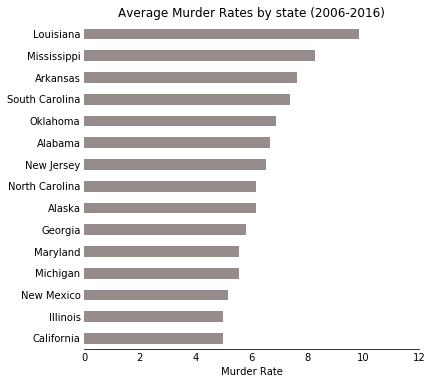

In [75]:
ave=dt.groupby('state').mean()
ave=ave.sort_values(by=['Rate'])
ave=ave[-15:]
plt.figure(figsize=(6, 6))
ax = plt.gca()
(ave['Rate']).plot(kind="barh", color="#968C8C")
plt.xlabel("Murder Rate")
plt.ylabel("")
ax.tick_params(axis='both', which='both',length=0)
plt.title('Average Murder Rates by state (2006-2016)')
ax.set_xlim(0,12)
sns.despine(left=True)


Graphing per state we can see that in fact Lousiana has the highest murder rate across US states. This was expected as high murder rate MSAs are located in this state and the others that make this ranking. 

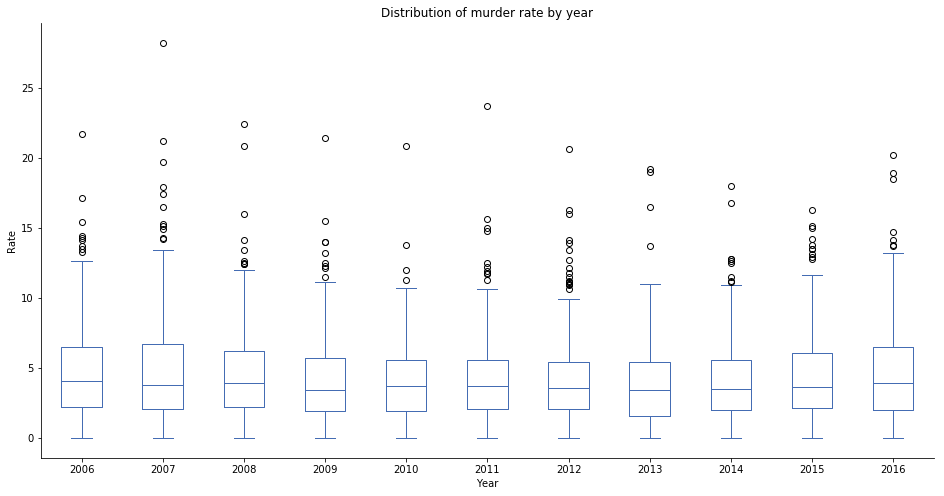

In [19]:
dty_pivots = dt.pivot_table(index='MSA', columns='year', values='Rate')
dty_pivots.plot(kind='box', figsize=[16,8], color='#446CB3')
plt.title('Distribution of murder rate by year')
plt.xlabel("Year")
plt.ylabel("Rate")
sns.despine()

After observing the previous graphs, we can see that it is relevant to see the distribution of murder rates per year. This allows us to see what if in fact there was a big increase in murder rates for this period or just some outliers are increasing the average value of murder rates. This graph describes the distribution of murder rate per year. It allows us to see that in fact the median of the distribution has not change a lot throughout the years. By looking at this graph we would actually see that Donald Trump is not correct in his statement.

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


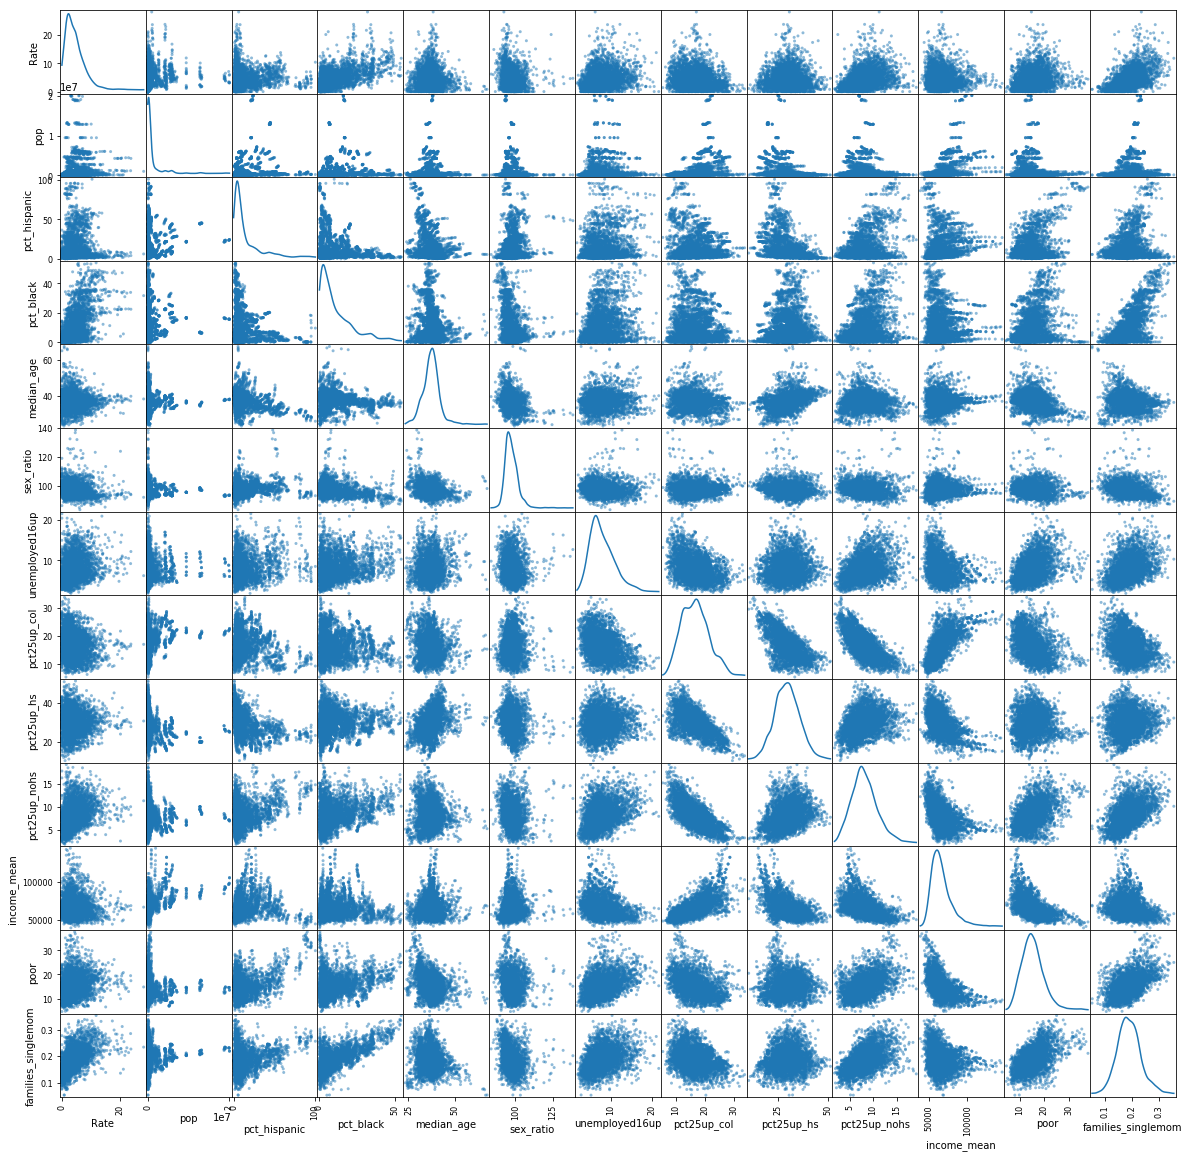

In [22]:
from pandas.tools.plotting import scatter_matrix
fig, ax = plt.subplots(1,1, figsize=(20,20))
axes = scatter_matrix(dt[['Rate','pop', 'pct_hispanic','pct_black', 'median_age', 'sex_ratio', 'unemployed16up','pct25up_col','pct25up_hs','pct25up_nohs','income_mean','poor','families_singlemom']], alpha=0.5, diagonal='kde', ax=ax)
plt.show()

Before we start with the statistical analysis we assess the behavior if the continous variables with each other in order to avoid collinearity. We can see that there are a several variables that seem to have a strong linear relationship. For example percentage of black anc hispanic population seem to be highly linearly related with the percentage of single mother families. These relations are important to be taken into consideration when dedicing which variables to include in the analysis. 

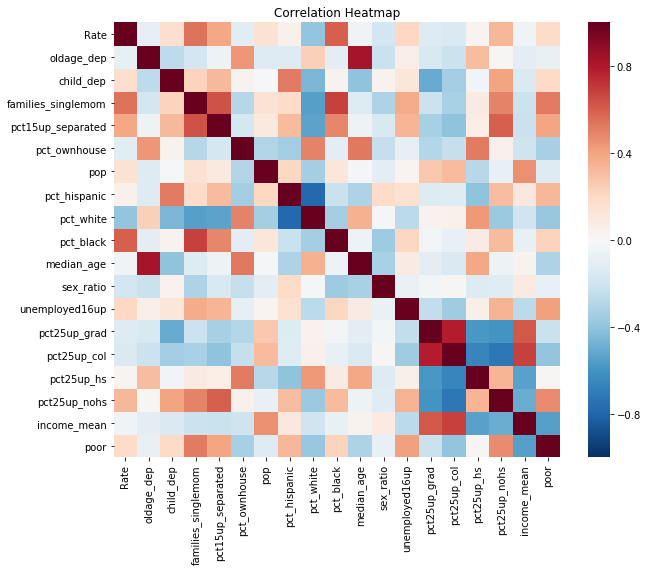

In [36]:
interesting_columns = ['Rate','oldage_dep','child_dep','families_singlemom','pct15up_separated','pct_ownhouse','pop', 'pct_hispanic','pct_white','pct_black', 'median_age', 'sex_ratio',  'unemployed16up','pct25up_grad','pct25up_col','pct25up_hs','pct25up_nohs','income_mean','poor']
dty_1=dt[interesting_columns]

fig, ax = plt.subplots(1,1, figsize=(10,8))
sns.heatmap(np.corrcoef(dty_1.T), ax=ax)
ax.set_xticklabels(interesting_columns, rotation='vertical')
ax.set_yticklabels(interesting_columns[::-1], rotation='horizontal')
plt.title('Correlation Heatmap')
plt.show()


It is with the same aim of understanding the relationship among variables that we create this correlation heatmap. The heatmap will bring light to colliniarity risks among variables. For example, we can see that old age dependency ratio seems to be highly correlated with median age. This map also helps us see variables that seem to be correlated with murder rate. This is important for our analysis as we are trying to identify which are the variables that contribute to an increase or a high murder rate. Variables like percentage of black population, of single mom families, unemployment of people older than 16, percentage of people over 25 with no highschool, poverty status and child dependency seem to be importantly correlated with murder rate.

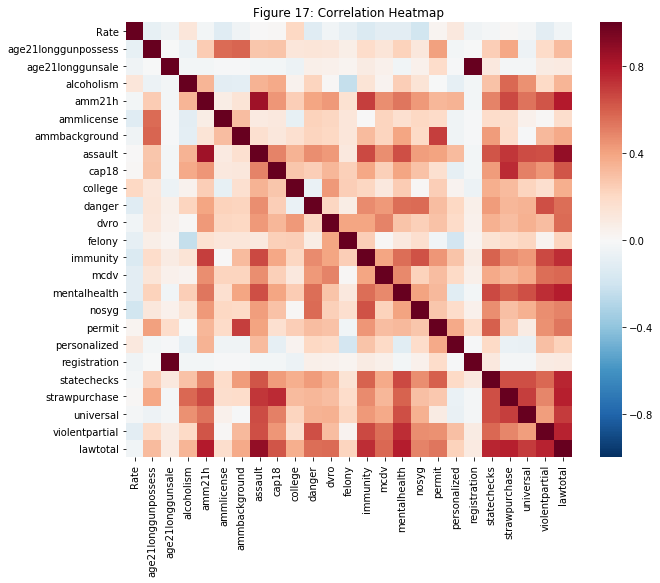

In [15]:
gun_vars = ['Rate', 'age21longgunpossess', 'age21longgunsale', 'alcoholism', 'amm21h', 'ammlicense',
            'ammbackground', 'assault', 'cap18', 'college', 'danger', 'dvro', 'felony', 'immunity', 'mcdv',
            'mentalhealth', 'nosyg', 'permit', 'personalized', 'registration', 'statechecks', 'strawpurchase',
            'universal', 'violentpartial', 'lawtotal']

dty_1=dt[gun_vars]

fig, ax = plt.subplots(1,1, figsize=(10,8))
sns.heatmap(np.corrcoef(dty_1.T), ax=ax)
ax.set_xticklabels(gun_vars, rotation='vertical')
ax.set_yticklabels(gun_vars[::-1], rotation='horizontal')
plt.title('Figure 17: Correlation Heatmap')
plt.show()


This heatmap shows the correlation among the variables of fire arm legislation. There is a lor of overlapp with these variables as there are some that can include the other. It is easy to see that most of these legislations do not have a strong correlation with murder rate. 

# Census data by topic

### By gender

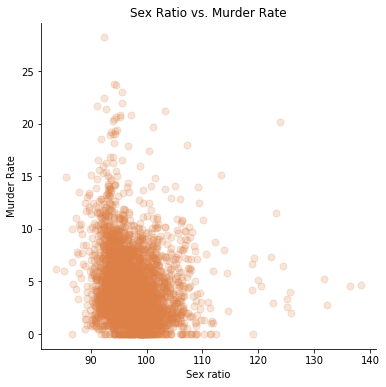

In [35]:
fig, ax = plt.subplots(1,1, figsize=(6, 6))

ax.plot(dt['sex_ratio'],dt['Rate'],  'o', color='#DD8047', markersize=7,alpha=0.2)
ax.set_xlabel("Sex ratio")
ax.set_ylabel("Murder Rate")
ax.set_title("Sex Ratio vs. Murder Rate")
sns.despine()

The graphs shows that there positive relationship between the sex ratio and the murder rate. This suggests that men have a higher contribution to murder rates. The latter is consistent with the literature review as several studies have shown that the highest crime related population are young men. 

### By race

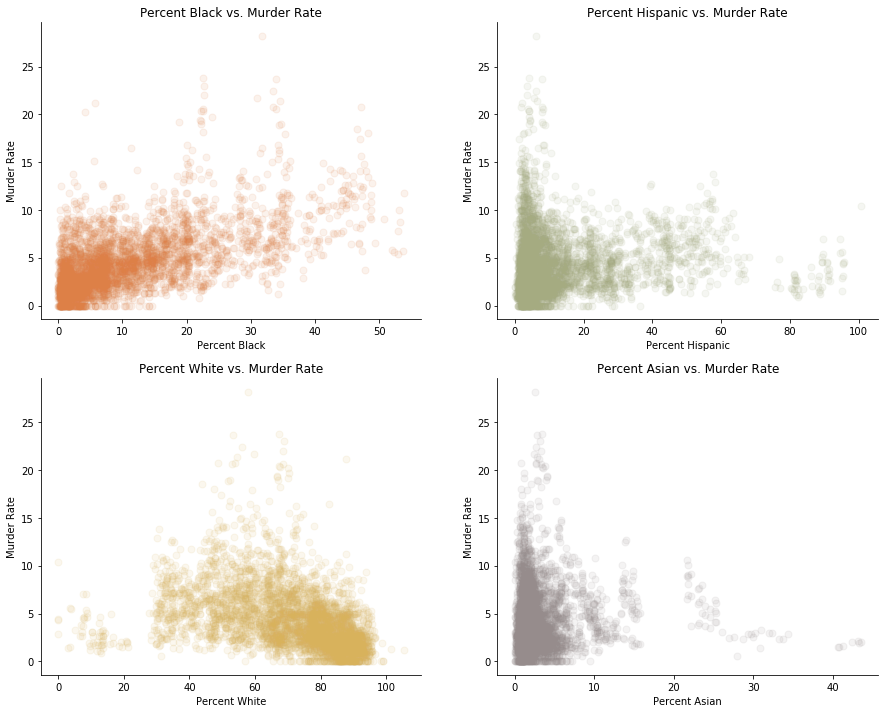

In [70]:
fig, ax = plt.subplots(2,2, figsize=(15, 12))

ax[0,0].plot(dt['pct_black'],dt['Rate'],  'o', markersize=7, color='#DD8047', alpha=0.1)
ax[0,0].set_xlabel("Percent Black")
ax[0,0].set_ylabel("Murder Rate")
ax[0,0].set_title("Percent Black vs. Murder Rate")

ax[0,1].plot(dt['pct_hispanic'],dt['Rate'],  'o', markersize=7, color='#A5AB81',alpha=0.1)
ax[0,1].set_xlabel("Percent Hispanic")
ax[0,1].set_ylabel("Murder Rate")
ax[0,1].set_title("Percent Hispanic vs. Murder Rate")

ax[1,0].plot(dt['pct_white'],dt['Rate'],  'o', markersize=7, color='#D8B25C', alpha=0.1)
ax[1,0].set_xlabel("Percent White")
ax[1,0].set_ylabel("Murder Rate")
ax[1,0].set_title("Percent White vs. Murder Rate")

ax[1,1].plot(dt['pct_asian'],dt['Rate'],  'o', markersize=7, color='#968C8C',alpha=0.1)
ax[1,1].set_xlabel("Percent Asian")
ax[1,1].set_ylabel("Murder Rate")
ax[1,1].set_title("Percent Asian vs. Murder Rate")
sns.despine()

Other factor that has proven to be consistent across studies that try to detangle what are the factors that contribute to crime and increases in murder rate, is the ratial composition of the population. In particular, crime and violence literature alludes to the positive relation among black and latino population and crime. These graphs verify this fact showing a positive linear relationship specially between the percentage of black population and murder rate. Additionally, by looking at the lower left graph, we can see that there is actually a negative relation between the percent of white population and murder rate. 

### By citizenship

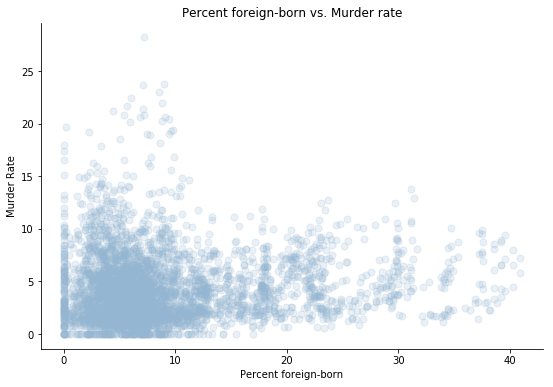

In [44]:
fig, ax = plt.subplots(1,1, figsize=(9, 6))
ax.plot(dt['pct_foreignborn'],dt['Rate'],  'o', color='#94B6D2', markersize=7, alpha=0.2)
ax.set_xlabel("Percent foreign-born")
ax.set_ylabel("Murder Rate")
ax.set_title("Percent foreign-born vs. Murder rate")
sns.despine()

This scatter plot shows, a not so strong, but positive relation between murder rate and the percen of foreign born population. It is ineteresting to notice that this graph looks very similar to the the graph decribing the relation between the percent of hispanic population and murder rate. This can suggest that a big composition of the foreign born are hispanic or latinos, which is consistent with US population composition.

### By civil status

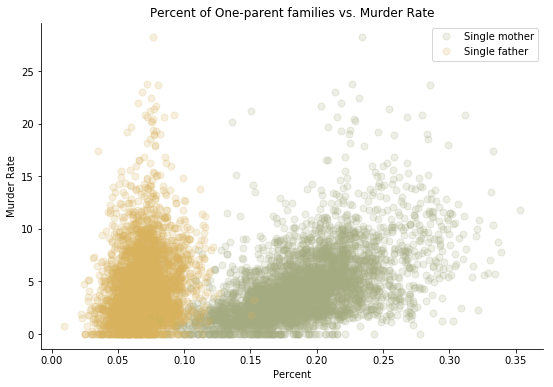

In [50]:
fig, ax = plt.subplots(1,1, figsize=(9, 6))

ax.plot(dt['families_singlemom'],dt['Rate'],  'o', markersize=7,label='Single mother', color='#A5AB81', alpha=0.2)
ax.plot(dt['families_singledad'],dt['Rate'],  'o', markersize=7,label='Single father', color='#D8B25C', alpha=0.2)
ax.set_ylabel("Murder Rate")
ax.set_xlabel("Percent")
ax.set_title("Percent of One-parent families vs. Murder Rate")
ax.legend(loc='best')

sns.despine()

This graph shows that, as was suggested in the correlation heatmap, there seems to be a positive relationship between the percent of single parent families and murder rate. The linear relation for families led by a single father is steaper than the one for families that have a single mother. This is interesting and might have important policy implications relating crime prevention, specially in young adults.

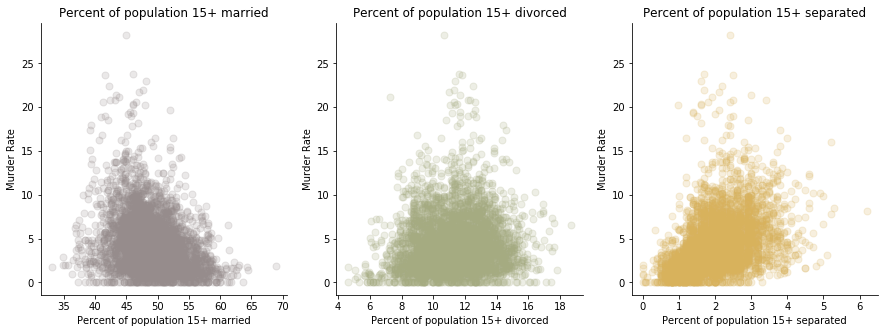

In [53]:
fig, ax = plt.subplots(1,3, figsize=(15, 5))
ax[0].plot(dt['pct15up_married'],dt['Rate'],  'o', markersize=7, color="#968C8C", alpha=0.2)
ax[0].set_xlabel("Percent of population 15+ married")
ax[0].set_ylabel("Murder Rate")
ax[0].set_title("Percent of population 15+ married")

ax[1].plot(dt['pct15up_divorced'],dt['Rate'],  'o',  markersize=7, color="#A5AB81", alpha=0.2)
ax[1].set_xlabel("Percent of population 15+ divorced")
ax[1].set_ylabel("Murder Rate")
ax[1].set_title("Percent of population 15+ divorced")


ax[2].plot(dt['pct15up_separated'],dt['Rate'],  'o',  markersize=7, color="#D8B25C", alpha=0.2)
ax[2].set_xlabel("Percent of population 15+ separated")
ax[2].set_ylabel("Murder Rate")
ax[2].set_title("Percent of population 15+ separated")
sns.despine()

These graphs show the relationship between murder rate and civil status. As the correlation heatmap already suggested, the percent of population over 15 which is separated or divorced appear to have a positive relationship with murder rate. The relationship is clearer for the population the is separated. On the contrary, we see that there seems to be a negative relationship among the population over 15 that is married.

### By education 

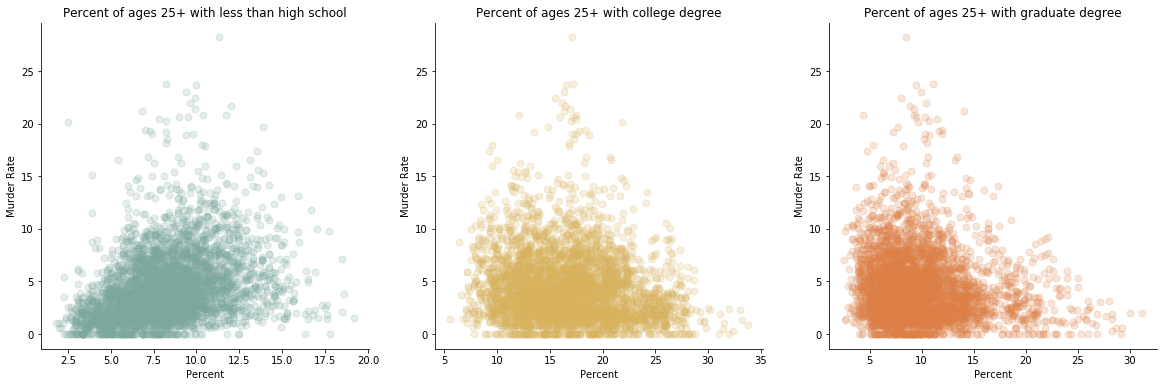

In [61]:
fig, ax = plt.subplots(1,3, figsize=(20, 6))
ax[0].plot(dt['pct25up_nohs'],dt['Rate'],  'o', markersize=7, alpha=0.2, color="#7BA79D")
ax[0].set_title("Percent of ages 25+ with less than high school")
ax[0].set_ylabel("Murder Rate")
ax[0].set_xlabel("Percent")

ax[1].plot(dt['pct25up_col'],dt['Rate'],  'o', markersize=7, alpha=0.2, color="#D8B25C")
ax[1].set_title("Percent of ages 25+ with college degree")
ax[1].set_ylabel("Murder Rate")
ax[1].set_xlabel("Percent")


ax[2].plot(dt['pct25up_grad'],dt['Rate'],  'o',  markersize=7,alpha=0.2, color="#DD8047")
ax[2].set_title("Percent of ages 25+ with graduate degree")
ax[2].set_ylabel("Murder Rate")
ax[2].set_xlabel("Percent")
sns.despine()

According to the literature review, there is an important relationship between education and crime. The rationale for this is that as education increases there are higher opportunities of employment, increases the expected future income, etc.. These three graphs confirm this theory by showing a positive relationship between murder rate and the percentage of population older than 25 with less than highschool and a negative relationship with the same cohort of population with college and graduate degree. 

### By poverty status

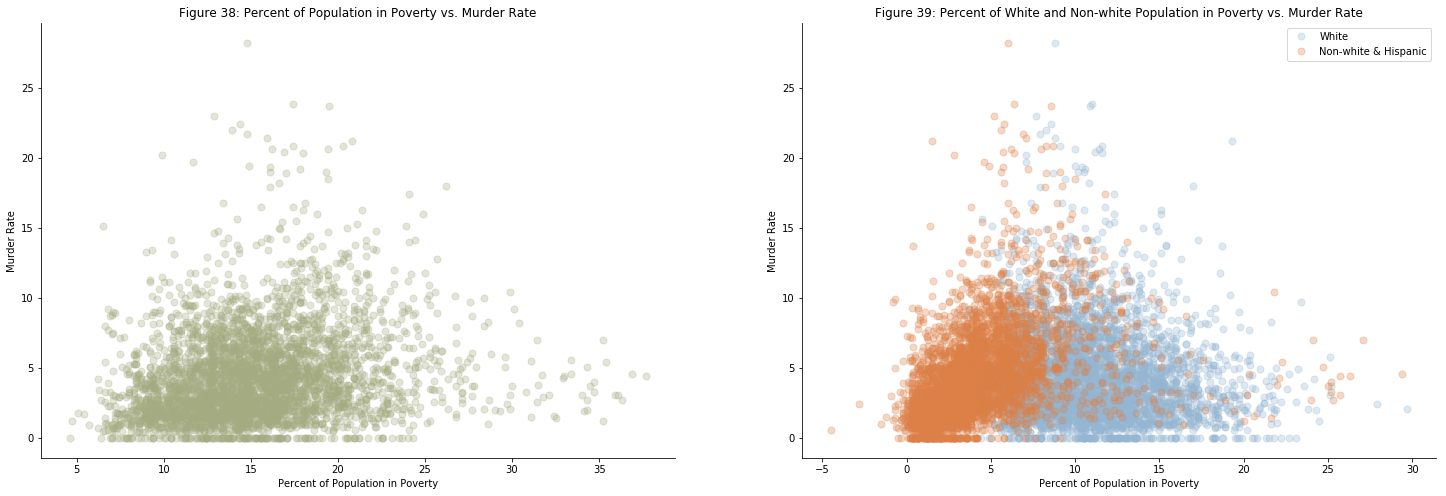

In [65]:
fig, ax = plt.subplots(1,2,figsize=(25, 8))
ax[0].plot(dt['poor'],dt['Rate'],  'o', markersize=7, alpha=0.3, color="#A5AB81")
ax[0].set_xlabel("Percent of Population in Poverty")
ax[0].set_ylabel("Murder Rate")
ax[0].set_title("Percent of Population in Poverty vs. Murder Rate")



ax[1].plot(dt['poor_white'],dt['Rate'],  'o', markersize=7,label='White', alpha=0.3, color="#94B6D2")
ax[1].plot((dt['poor']-dt['poor_white']),dt['Rate'],  'o', markersize=7,label='Non-white & Hispanic', alpha=0.3, color="#DD8047")
ax[1].set_xlabel("Percent of Population in Poverty")
ax[1].set_ylabel("Murder Rate")
ax[1].set_title("Percent of White and Non-white Population in Poverty vs. Murder Rate")
ax[1].legend(loc='best')

sns.despine()

Looking at these graphs we can see that there seems to be a positive relationship between poverty status and murder rate. The left side graphs distinguishes this effect accross white and non white population. The positive relationship seems to be consistent for both of the populations. The relationship is as expected as poverty can increase crime related to gun violence, which increases the risk of murder.

### By unemployment

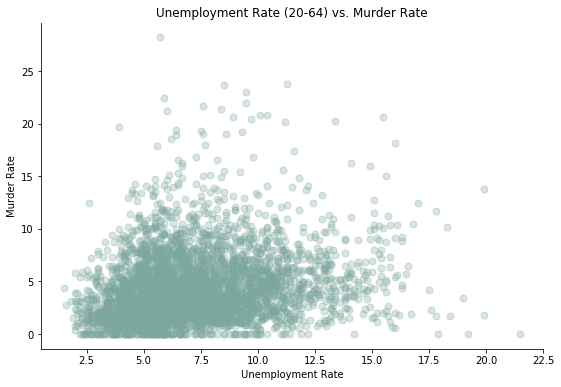

In [68]:
fig, ax = plt.subplots(figsize=(9, 6))
plt.plot(dt['unemployed20_64'],dt['Rate'],  'o', markersize=7, alpha=0.3, color="#7BA79D")
plt.xlabel("Unemployment Rate")
plt.ylabel("Murder Rate")
plt.title("Unemployment Rate (20-64) vs. Murder Rate")
sns.despine()


This graph suggest that there is a positive relationship between murder rate and unmeployment rate. This relationship is consistent with the findings in the literature review. By having more unmeployment there might be an increase in crime and therefore in murder rates. 